Original:


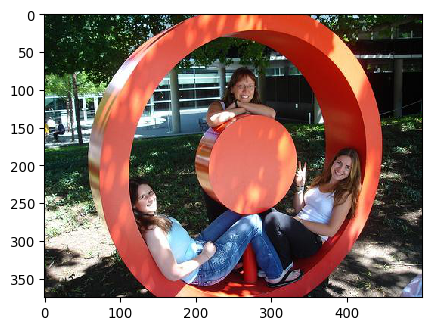

In [55]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
%matplotlib inline

image = imageio.imread("/Users/shimash/UNET/data/instance-level_human_parsing/Training/Images/0000131.jpg")
images_different_sizes = [
    imageio.imread("/Users/shimash/UNET/data/instance-level_human_parsing/Training/Images/0000131.jpg"),
    imageio.imread("/Users/shimash/UNET/data/instance-level_human_parsing/Training/Images/0000132.jpg"),
    imageio.imread("/Users/shimash/UNET/data/instance-level_human_parsing/Training/Images/0000133.jpg")
]

print("Original:")
ia.imshow(image)

In [56]:
def fixFillMode(x, mode="reflect"):
            clsName = x.__class__.__name__
            # clsName = type(x).__name__
            if clsName == "CropAndPad":
                x._pad_mode_segmentation_maps = mode
            elif clsName == "Affine":
                x._mode_segmentation_maps = mode
            return x

seq = iaa.Sequential(
            [
                iaa.Fliplr(0.5),
                iaa.Flipud(0.2),# vertical
                iaa.Sometimes(
                    0.5,
                    fixFillMode(
                        iaa.CropAndPad(
                            percent=(-0.05, 0.1), pad_mode="reflect", pad_cval=(0, 255)
                        )
                    ),
                ),
                #affine transformation
                iaa.Sometimes(
                    0.5,
                    fixFillMode(
                        iaa.Affine(
                            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                            rotate=(-25, 25),
                            shear=(-16, 16),
                            order=[0, 1],
                            cval=(0, 255),
                            mode="reflect",
                        )
                    ),
                ),
                iaa.SomeOf(
                    (0, 3),
                    [
                        iaa.OneOf(
                            [
                                iaa.GaussianBlur((0, 3.0)),
                                iaa.AverageBlur(k=(2, 7)),
                                iaa.MedianBlur(k=(3, 11)),
                            ]
                        ),
                        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),
                        iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),
                        iaa.SimplexNoiseAlpha(
                            iaa.OneOf(
                                [
                                    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                                    iaa.DirectedEdgeDetect(
                                        alpha=(0.5, 1.0), direction=(0.0, 1.0)
                                    ),
                                ]
                            )
                        ),
                        iaa.AdditiveGaussianNoise(
                            loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5
                        ),
                        iaa.OneOf(
                            [
                                iaa.Dropout((0.01, 0.1), per_channel=0.5), #some of pixels
                                iaa.CoarseDropout(
                                    (0.03, 0.15),
                                    size_percent=(0.02, 0.05),
                                    per_channel=0.2,
                                ),
                            ]
                        ),
                        iaa.Add((-10, 10), per_channel=0.5),
                        iaa.AddToHueAndSaturation((-20, 20)), 
                        iaa.OneOf(
                            [
                                iaa.Multiply((0.5, 1.5), per_channel=0.5),
                                iaa.FrequencyNoiseAlpha(
                                    exponent=(-4, 0),
                                    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                                    second=iaa.ContrastNormalization((0.5, 2.0)),
                                ),
                            ]
                        ),
                        iaa.contrast.LinearContrast((0.75, 1.20), per_channel=0.5),
                        iaa.Grayscale(alpha=(0.0, 1.0)),
                        iaa.Sometimes(
                            0.5, iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)
                        ),
                        iaa.Sometimes(0.5, iaa.PiecewiseAffine(scale=(0.01, 0.05))),
                        iaa.Sometimes(0.5, iaa.PerspectiveTransform(scale=(0.01, 0.1))),
                    ],
                    random_order=True,
                ),
            ],
            random_order=True,
        )

Image 0 (input shape: (375, 500, 3), output shape: (375, 500, 3))


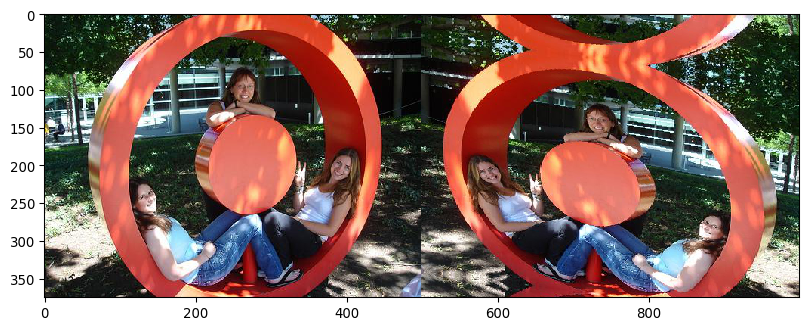

Image 1 (input shape: (375, 500, 3), output shape: (375, 500, 3))


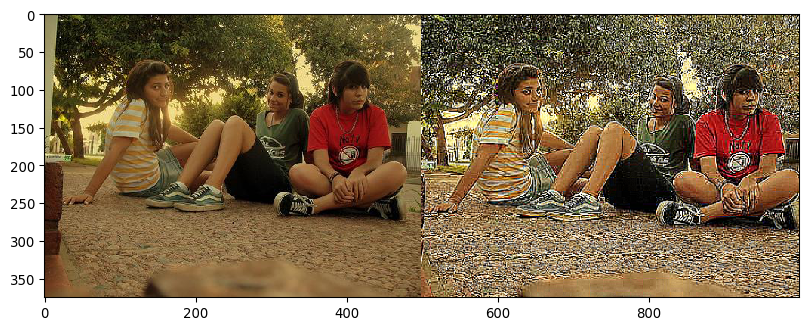

Image 2 (input shape: (332, 500, 3), output shape: (332, 500, 3))


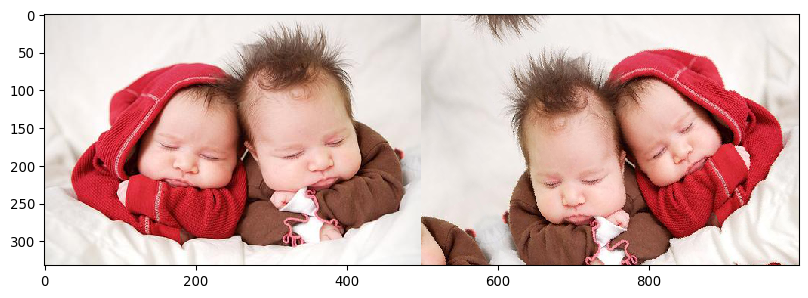

In [57]:
images_aug = seq.augment_images(images_different_sizes)


print("Image 0 (input shape: %s, output shape: %s)" % (images_different_sizes[0].shape, images_aug[0].shape))
ia.imshow(np.hstack([images_different_sizes[0], images_aug[0]]))

print("Image 1 (input shape: %s, output shape: %s)" % (images_different_sizes[1].shape, images_aug[1].shape))
ia.imshow(np.hstack([images_different_sizes[1], images_aug[1]]))

print("Image 2 (input shape: %s, output shape: %s)" % (images_different_sizes[2].shape, images_aug[2].shape))
ia.imshow(np.hstack([images_different_sizes[2], images_aug[2]]))